Descriptive Statistics in R

First lets get the data.

In [1]:
library('MASS')
library(ggthemes)
dim(Cars93)

[1] 93 27

The cars 93 data from the MASS library has 93 rows and 27 columns.

In [2]:
print(ncol(Cars93))

[1] 27


In [3]:
print(nrow(Cars93))

[1] 93


In [4]:
head(Cars93)

Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16,2880,USA,Buick Century


Lets convert this to a tibble so its easy to work with

In [5]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.3.0
v tibble  2.0.1     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()


In [6]:
cars_df = as_tibble(Cars93)
head(cars_df)

Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16,2880,USA,Buick Century


Now lets count the number of cars that originated in USA.

In [7]:
cars_df %>%
  filter(Origin == 'USA') %>%
  count() %>%
.[[1]]

[1] 48

48 Cars from the data have origin in the USA.

To get the cars that are not originated in the USA, we can use the `!` sign

In [8]:
cars_df %>%
  filter(Origin != 'USA') %>%
  count() %>%
.[[1]]

[1] 45

45 cars are not originated from the USA.

A more complicated filter is for the following condition.

Car Originated in the USA and has 4 Cylinders.

In [9]:
cars_df %>%
  filter(Origin == 'USA' & Cylinders == 4) %>%
  count() %>%
.[[1]]

[1] 22

So 22 cars that have cylinders and origin as USA.

---
Get hthe max and min horsepower of the cars.

Max Horsepower

In [10]:
max(cars_df$Horsepower)

[1] 300

Minimum Horserpower

In [11]:
min(cars_df$Horsepower)

[1] 55

Frequency of cars with different sizes.

In [12]:
cars_df %>%
  group_by(Type) %>%
  tally()

Type,n
Compact,16
Large,11
Midsize,22
Small,21
Sporty,14
Van,9


In [13]:
cars_df %>%
  group_by(Type) %>%
  count(Origin)

Type,Origin,n
Compact,USA,7
Compact,non-USA,9
Large,USA,11
Midsize,USA,10
Midsize,non-USA,12
Small,USA,7
Small,non-USA,14
Sporty,USA,8
Sporty,non-USA,6
Van,USA,5


Get the proportion of each count.

In [14]:

cars_df %>%
  group_by(Type) %>%
  summarise(n = n()) %>%
  mutate(prop_percent = round(n/sum(n) * 100))

Type,n,prop_percent
Compact,16,17
Large,11,12
Midsize,22,24
Small,21,23
Sporty,14,15
Van,9,10


Creating a Frequency distribution table for the Car Prices.

In [15]:
cars_df %>%
  group_by(price_range = cut(Price,breaks = seq(0, max(Price) + 10, 10))) %>%
  summarise(freq = n())

price_range,freq
"(0,10]",12
"(10,20]",50
"(20,30]",19
"(30,40]",9
"(40,50]",2
"(60,70]",1


Creating a Cumulative Frequency Table.

In [16]:
cars_df %>%
  group_by(group = cut(Price,breaks = seq(0, max(Price) + 10, 10))) %>%
  summarise(freq = n()) %>%
  mutate(cumulative_freq = cumsum(freq))

group,freq,cumulative_freq
"(0,10]",12,12
"(10,20]",50,62
"(20,30]",19,81
"(30,40]",9,90
"(40,50]",2,92
"(60,70]",1,93


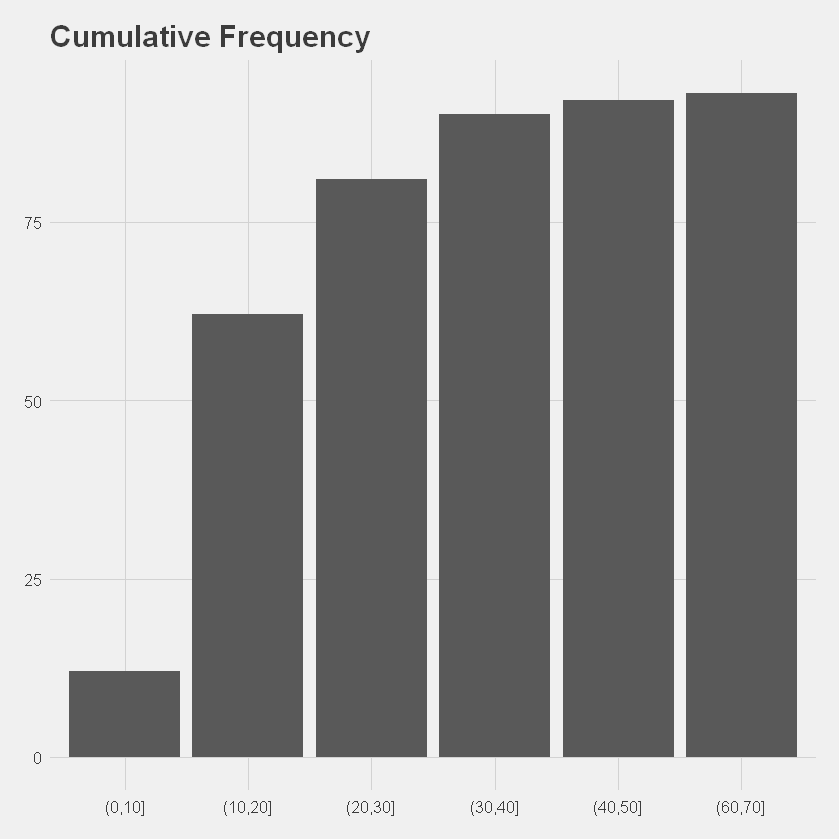

In [17]:
cars_df %>%
  group_by(group = cut(Price,breaks = seq(0, max(Price) + 10, 10))) %>%
  summarise(freq = n()) %>%
  mutate(cumulative_freq = cumsum(freq)) %>%
  ggplot(aes(x = group, y = cumulative_freq)) +
  geom_bar(stat = 'identity') +
  labs(x = 'Price range',
       y = 'Frequency',
       title = 'Cumulative Frequency') +
  theme_fivethirtyeight()

The empirical cumulative distribution function (ECDF)

The empirical cumulative distribution function (ecdf) is closely related to cumulative frequency. Rather than show the frequency in an interval, however, the ecdf shows the proportion of scores that are less than or equal to each score

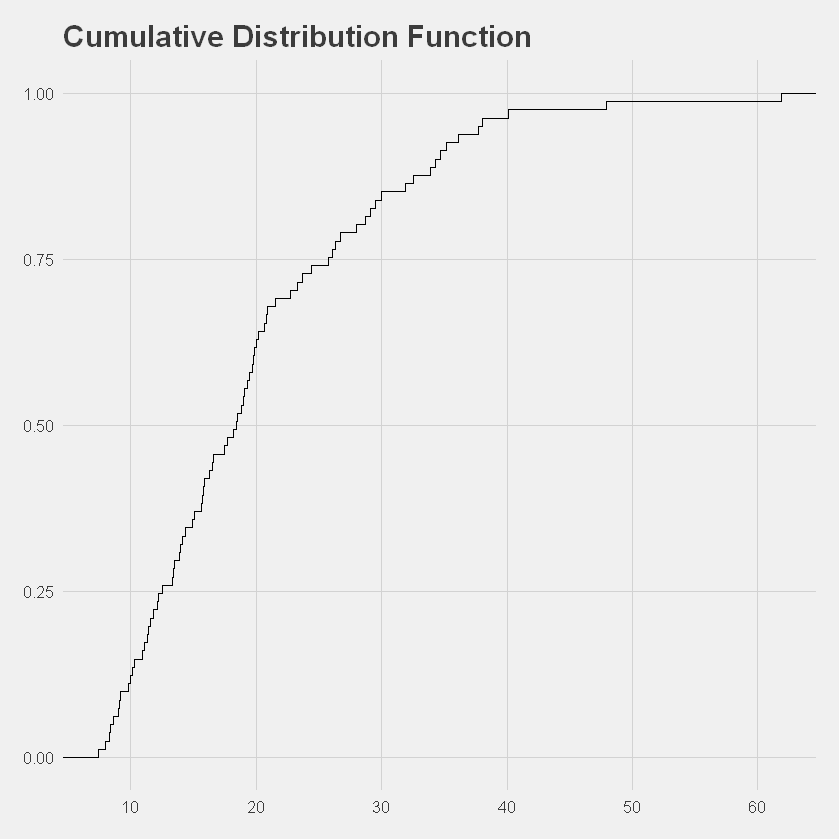

In [18]:
cars_df %>%
  group_by(Price) %>%
  summarise(n = n()) %>%
  mutate(prop_percent = round(n/sum(n) * 100)) %>%
  ggplot(aes(x = Price, y = prop_percent)) +
  geom_step(stat = 'ecdf') +
  labs(x = 'Price',
       y = 'Cumulative Distribution',
       title = 'Cumulative Distribution Function') +
  scale_x_continuous(breaks = seq(0,100,10)) +
  theme_fivethirtyeight()

Plotting the quantiles. The dashed lines represent the quantiles, of the car prices.

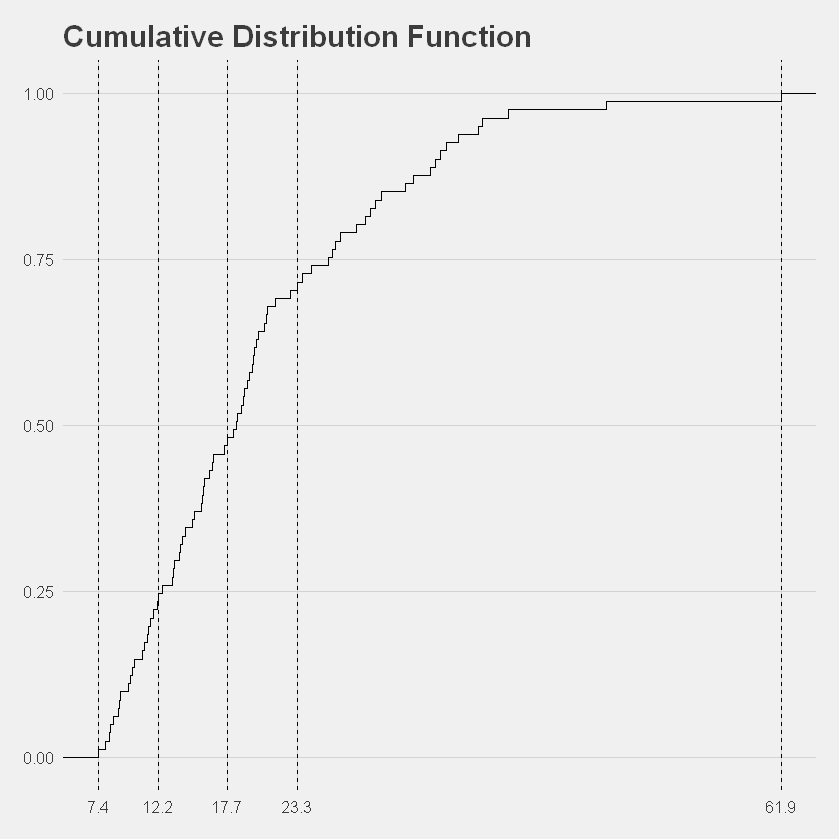

In [19]:
p_quantile <- quantile(cars_df$Price)

p <- cars_df %>%
  group_by(Price) %>%
  summarise(n = n()) %>%
  mutate(prop_percent = round(n/sum(n) * 100)) %>%
  ggplot(aes(x = Price, y = prop_percent)) +
  geom_step(stat = 'ecdf') +
  labs(x = 'Price',
       y = 'Cumulative Distribution',
       title = 'Cumulative Distribution Function')

p +
  geom_vline(xintercept = p_quantile,
             linetype='dashed') +
  scale_x_continuous(breaks = p_quantile,
                     labels = p_quantile) +
  theme_fivethirtyeight()

Stem and Leaf Plot

In [20]:
stem(cars_df$Price)


  The decimal point is 1 digit(s) to the right of the |

  0 | 788889999
  1 | 00000111111222233344444556666666667788888999999
  2 | 00000001112333446667899
  3 | 00234455688
  4 | 08
  5 | 
  6 | 2



The value on the left is stem, and the digits on the right are leaves. The values are rounded. To read the value, we take the number on the left and multiply it by 10 and then add the number on the right.

So the first row has numbers

7,8,8,... etc

and the last row is 

62.